In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder


In [2]:
df = pd.read_csv("C:\\Users\\preet\\Documents\\EVData\\EVData.csv")
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [3]:
Data1 = df.loc[df.region == "USA"]

In [4]:
Data1

,region,category,parameter,mode,powertrain,year,unit,value
10667,USA,Historical,EV sales,Cars,BEV,2010,Vehicles,1200.00000
10668,USA,Historical,EV stock,Cars,BEV,2010,Vehicles,3800.00000
10669,USA,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,0.00016
10670,USA,Historical,"Oil displacement, million lge",Cars,EV,2010,"Oil displacement, million lge",9.40000
10671,USA,Historical,Electricity demand,Cars,EV,2010,GWh,96.00000
...,...,...,...,...,...,...,...,...
11399,USA,Projection-APS,Oil displacement Mbd,Cars,EV,2035,Milion barrels per day,2.00000
11400,USA,Projection-APS,"Oil displacement, million lge",Buses,EV,2035,"Oil displacement, million lge",6000.00000
11401,USA,Projection-APS,"Oil displacement, million lge",Trucks,EV,2035,"Oil displacement, million lge",37000.00000
11402,USA,Projection-APS,"Oil displacement, million lge",Vans,EV,2035,"Oil displacement, million lge",14000.00000


In [5]:
Data2 = Data1.loc[Data1.unit == "Vehicles"]

In [6]:
Data2

,region,category,parameter,mode,powertrain,year,unit,value
10667,USA,Historical,EV sales,Cars,BEV,2010,Vehicles,1200.0
10668,USA,Historical,EV stock,Cars,BEV,2010,Vehicles,3800.0
10686,USA,Historical,EV stock,Cars,BEV,2011,Vehicles,14000.0
10687,USA,Historical,EV sales,Cars,BEV,2011,Vehicles,9800.0
10688,USA,Historical,EV stock,Cars,PHEV,2011,Vehicles,8000.0
...,...,...,...,...,...,...,...,...
11391,USA,Projection-APS,EV stock,Vans,FCEV,2035,Vehicles,300000.0
11392,USA,Projection-APS,EV stock,Vans,PHEV,2035,Vehicles,260000.0
11393,USA,Projection-APS,EV stock,Cars,BEV,2035,Vehicles,76000000.0
11394,USA,Projection-APS,EV stock,Cars,FCEV,2035,Vehicles,130000.0


In [7]:
Data3 = Data2.loc[Data2.parameter == "EV sales"]

In [8]:
Data3

,region,category,parameter,mode,powertrain,year,unit,value
10667,USA,Historical,EV sales,Cars,BEV,2010,Vehicles,1200.0
10687,USA,Historical,EV sales,Cars,BEV,2011,Vehicles,9800.0
10689,USA,Historical,EV sales,Cars,PHEV,2011,Vehicles,8000.0
10690,USA,Historical,EV sales,Buses,BEV,2011,Vehicles,190.0
10693,USA,Historical,EV sales,Buses,BEV,2012,Vehicles,6.5
...,...,...,...,...,...,...,...,...
11379,USA,Projection-APS,EV sales,Vans,BEV,2035,Vehicles,920000.0
11380,USA,Projection-APS,EV sales,Vans,FCEV,2035,Vehicles,60000.0
11381,USA,Projection-APS,EV sales,Cars,BEV,2035,Vehicles,9500000.0
11382,USA,Projection-APS,EV sales,Cars,FCEV,2035,Vehicles,21000.0


In [9]:
Data4 = Data3.loc[Data3['mode'] == "Cars"]

In [10]:
Data4

,region,category,parameter,mode,powertrain,year,unit,value
10667,USA,Historical,EV sales,Cars,BEV,2010,Vehicles,1200.0
10687,USA,Historical,EV sales,Cars,BEV,2011,Vehicles,9800.0
10689,USA,Historical,EV sales,Cars,PHEV,2011,Vehicles,8000.0
10694,USA,Historical,EV sales,Cars,PHEV,2012,Vehicles,39000.0
10696,USA,Historical,EV sales,Cars,BEV,2012,Vehicles,15000.0
...,...,...,...,...,...,...,...,...
11323,USA,Projection-STEPS,EV sales,Cars,FCEV,2035,Vehicles,21000.0
11324,USA,Projection-STEPS,EV sales,Cars,PHEV,2035,Vehicles,1900000.0
11381,USA,Projection-APS,EV sales,Cars,BEV,2035,Vehicles,9500000.0
11382,USA,Projection-APS,EV sales,Cars,FCEV,2035,Vehicles,21000.0


In [11]:
Data5 = Data4.loc[Data4['powertrain'] == "BEV"]

In [12]:
Data5

,region,category,parameter,mode,powertrain,year,unit,value
10667,USA,Historical,EV sales,Cars,BEV,2010,Vehicles,1200.0
10687,USA,Historical,EV sales,Cars,BEV,2011,Vehicles,9800.0
10696,USA,Historical,EV sales,Cars,BEV,2012,Vehicles,15000.0
10721,USA,Historical,EV sales,Cars,BEV,2013,Vehicles,48000.0
10732,USA,Historical,EV sales,Cars,BEV,2014,Vehicles,63000.0
10760,USA,Historical,EV sales,Cars,BEV,2015,Vehicles,71000.0
10775,USA,Historical,EV sales,Cars,BEV,2016,Vehicles,87000.0
10804,USA,Historical,EV sales,Cars,BEV,2017,Vehicles,100000.0
10823,USA,Historical,EV sales,Cars,BEV,2018,Vehicles,240000.0
10844,USA,Historical,EV sales,Cars,BEV,2019,Vehicles,240000.0


In [13]:
new_df = Data5.loc[:, ['year', 'value']]

In [14]:
new_df

,year,value
10667,2010,1200.0
10687,2011,9800.0
10696,2012,15000.0
10721,2013,48000.0
10732,2014,63000.0
10760,2015,71000.0
10775,2016,87000.0
10804,2017,100000.0
10823,2018,240000.0
10844,2019,240000.0


In [15]:
new_df.rename(columns={ 'value': '# of BEV Cars'}, inplace=True)

In [17]:
new_df

,year,# of BEV Cars
10667,2010,1200.0
10687,2011,9800.0
10696,2012,15000.0
10721,2013,48000.0
10732,2014,63000.0
10760,2015,71000.0
10775,2016,87000.0
10804,2017,100000.0
10823,2018,240000.0
10844,2019,240000.0


<Axes: xlabel='year'>

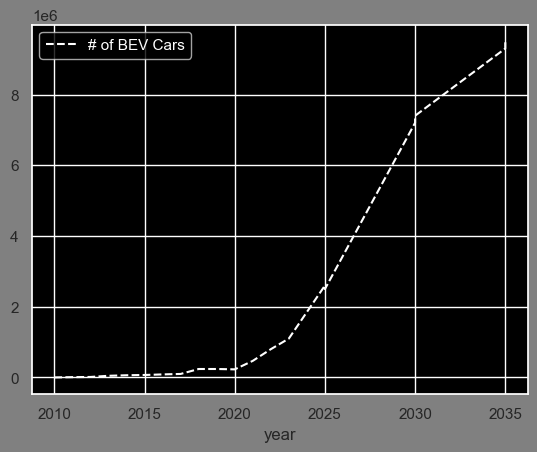

In [91]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'gray'})
plt.rc('text', color='white')
new_df.plot( x= 'year' , y= '# of BEV Cars',color='white', linestyle='dashed'  )

In [26]:
Data6 = Data4.loc[Data4['powertrain'] == "PHEV"]

In [27]:
Data6

,region,category,parameter,mode,powertrain,year,unit,value
10689,USA,Historical,EV sales,Cars,PHEV,2011,Vehicles,8000.0
10694,USA,Historical,EV sales,Cars,PHEV,2012,Vehicles,39000.0
10723,USA,Historical,EV sales,Cars,PHEV,2013,Vehicles,49000.0
10728,USA,Historical,EV sales,Cars,PHEV,2014,Vehicles,55000.0
10764,USA,Historical,EV sales,Cars,PHEV,2015,Vehicles,43000.0
10771,USA,Historical,EV sales,Cars,PHEV,2016,Vehicles,73000.0
10808,USA,Historical,EV sales,Cars,PHEV,2017,Vehicles,94000.0
10819,USA,Historical,EV sales,Cars,PHEV,2018,Vehicles,120000.0
10848,USA,Historical,EV sales,Cars,PHEV,2019,Vehicles,85000.0
10867,USA,Historical,EV sales,Cars,PHEV,2020,Vehicles,64000.0


In [20]:
new_df2 = Data6.loc[:, ['year', 'value']]

In [21]:
new_df2

,year,value
10689,2011,8000.0
10694,2012,39000.0
10723,2013,49000.0
10728,2014,55000.0
10764,2015,43000.0
10771,2016,73000.0
10808,2017,94000.0
10819,2018,120000.0
10848,2019,85000.0
10867,2020,64000.0


In [59]:
new_df2.rename(columns={'year2': 'year' ,'value': '# of PHEV Cars'}, inplace=True)

In [60]:
new_df2

,year,# of PHEV Cars
10689,2011,8000.0
10694,2012,39000.0
10723,2013,49000.0
10728,2014,55000.0
10764,2015,43000.0
10771,2016,73000.0
10808,2017,94000.0
10819,2018,120000.0
10848,2019,85000.0
10867,2020,64000.0


<Axes: xlabel='year'>

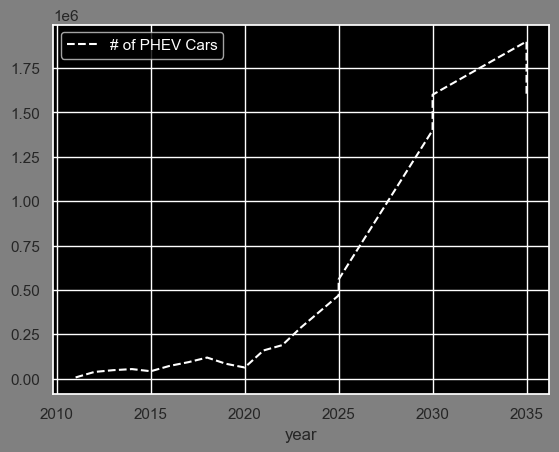

In [92]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'gray'})
plt.rc('text', color='white')
new_df2.plot( x= 'year' , y= '# of PHEV Cars',color='white', linestyle='dashed'  )


In [25]:
Data7 = Data4.loc[Data4['powertrain'] == "FCEV"]

In [28]:
Data7

,region,category,parameter,mode,powertrain,year,unit,value
10730,USA,Historical,EV sales,Cars,FCEV,2014,Vehicles,55.0
10762,USA,Historical,EV sales,Cars,FCEV,2015,Vehicles,100.0
10773,USA,Historical,EV sales,Cars,FCEV,2016,Vehicles,1100.0
10806,USA,Historical,EV sales,Cars,FCEV,2017,Vehicles,2300.0
10821,USA,Historical,EV sales,Cars,FCEV,2018,Vehicles,2700.0
10846,USA,Historical,EV sales,Cars,FCEV,2019,Vehicles,2000.0
10869,USA,Historical,EV sales,Cars,FCEV,2020,Vehicles,1200.0
10885,USA,Projection-STEPS,EV sales,Cars,FCEV,2020,Vehicles,1200.0
10896,USA,Projection-APS,EV sales,Cars,FCEV,2020,Vehicles,1200.0
10953,USA,Projection-APS,EV sales,Cars,FCEV,2021,Vehicles,3100.0


In [29]:
new_df3 = Data7.loc[:, ['year', 'value']]

In [30]:
new_df3

,year,value
10730,2014,55.0
10762,2015,100.0
10773,2016,1100.0
10806,2017,2300.0
10821,2018,2700.0
10846,2019,2000.0
10869,2020,1200.0
10885,2020,1200.0
10896,2020,1200.0
10953,2021,3100.0


In [62]:
new_df3.rename(columns={ 'year3': 'year','value': '# of FCEV Cars'}, inplace=True)

In [63]:
new_df3

,year,# of FCEV Cars
10730,2014,55.0
10762,2015,100.0
10773,2016,1100.0
10806,2017,2300.0
10821,2018,2700.0
10846,2019,2000.0
10869,2020,1200.0
10885,2020,1200.0
10896,2020,1200.0
10953,2021,3100.0


<Axes: xlabel='year'>

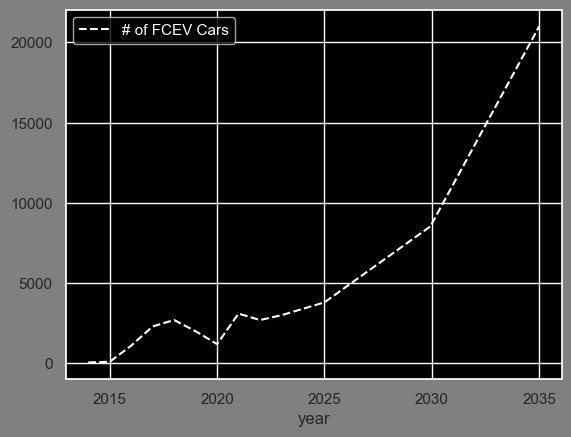

In [88]:

sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'gray'})
plt.rc('text', color='white')
new_df3.plot( x= 'year' , y= '# of FCEV Cars', color='white', linestyle='dashed'  )
